In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load Data
df = pd.read_csv(r"D:\Airbnb_Python_Project\Python-Project-P2-New-York-AirBnb-Listing-2024\datasets.csv")

In [5]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,20/12/15,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20770 non-null  object 
 1   name                            20770 non-null  object 
 2   host_id                         20770 non-null  object 
 3   host_name                       20770 non-null  object 
 4   neighbourhood_group             20770 non-null  object 
 5   neighbourhood                   20763 non-null  object 
 6   latitude                        20763 non-null  float64
 7   longitude                       20763 non-null  float64
 8   room_type                       20763 non-null  object 
 9   price                           20736 non-null  float64
 10  minimum_nights                  20763 non-null  float64
 11  number_of_reviews               20763 non-null  float64
 12  last_review                     

#### Change Data Types for `id` and `host_id` columns

In [8]:
# Change Data Types for id and host_id columns

for column in df.columns:
    if column == 'id' or column == 'host_id':
        df[column] = df[column].astype('object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20770 non-null  object 
 1   name                            20770 non-null  object 
 2   host_id                         20770 non-null  object 
 3   host_name                       20770 non-null  object 
 4   neighbourhood_group             20770 non-null  object 
 5   neighbourhood                   20763 non-null  object 
 6   latitude                        20763 non-null  float64
 7   longitude                       20763 non-null  float64
 8   room_type                       20763 non-null  object 
 9   price                           20736 non-null  float64
 10  minimum_nights                  20763 non-null  float64
 11  number_of_reviews               20763 non-null  float64
 12  last_review                     

In [13]:
# Null Value Check for all columns
df.isnull().sum()

# drop null values from dataset
df.dropna(inplace = True)

#### *Duplicate Value check and drop those Duplicate rows*

In [21]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [23]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228.0,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,20/12/15,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,45277537.0,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
2,971000000000000000.0,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
3,3857863.0,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
4,40896611.0,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,03/12/23,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1


In [33]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,20724.000000,20724.000000,20724.000000,20724.000000,20724.000000,20724.000000,20724.000000,20724.000000,20724.000000,20724.000000
mean,40.726843,-73.939155,187.732195,28.566396,42.592646,1.257529,18.840041,205.940938,10.844480,1.723412
std,0.060320,0.061442,1023.539393,33.560272,73.534712,1.905221,70.944874,135.101383,21.359681,1.211237
min,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,40.684150,-73.980760,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,40.722937,-73.949599,125.000000,30.000000,14.000000,0.650000,2.000000,214.000000,3.000000,1.000000
75%,40.763132,-73.917430,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


### EDA

#### *Univariate Analysis*

<Axes: xlabel='price'>

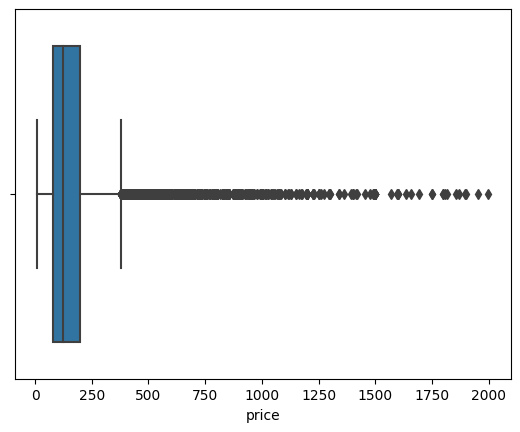

In [41]:
## Outlier Identify for price column using boxplot

sns.boxplot(data = df_price_20000, x = 'price')

In [40]:
# Create dataframe where price below 20000

df_price_20000 = df[df['price'] < 2000]

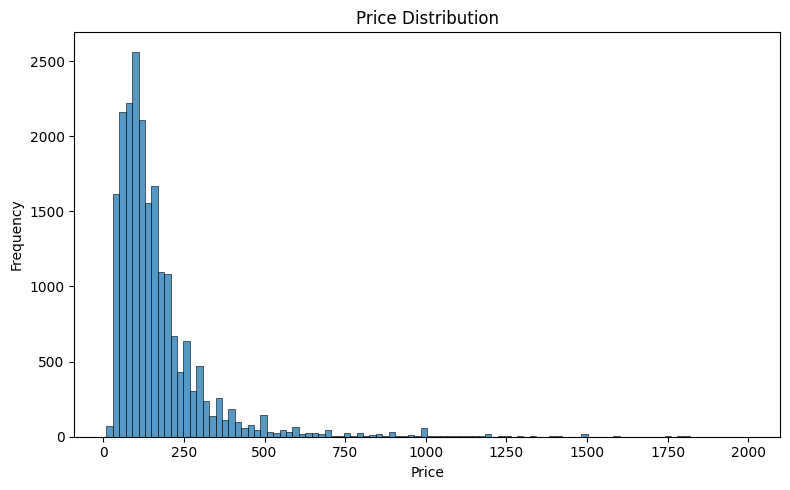

In [45]:
# Price Distribution
df['price'].value_counts()
plt.figure(figsize=(8,5))
sns.histplot(data = df_price_20000, x='price', bins= 100
            )
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.tight_layout()
plt.show()

In [46]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths'],
      dtype='object')

In [50]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

#### **Most Preferable Room Type by Users**

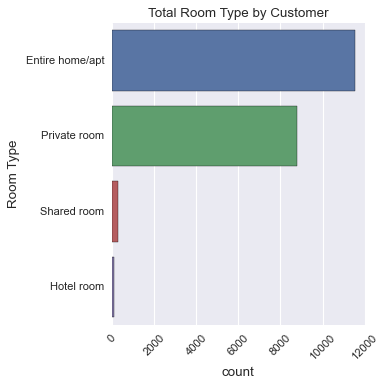

In [70]:
# print(plt.style.available)
plt.style.use('seaborn-v0_8')
sns.catplot(data = df,
            kind = 'count',
            y = 'room_type',
            order =df['room_type'].value_counts().index)
# plt.rcParams['figure.figsize'] = [3,2]
plt.ylabel('Room Type')
plt.title('Total Room Type by Customer')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [75]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths', 'Price_Per_Bed'],
      dtype='object')

#### Price per Bed by Neighbourhood Group

In [72]:
df.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx            118.407798
Brooklyn         187.196647
Manhattan        227.585979
Queens           126.521415
Staten Island    118.780069
Name: price, dtype: float64

In [73]:
df['Price_Per_Bed'] = df['price'] / df['beds']

In [81]:
price_per_bed = df.groupby('neighbourhood_group')['Price_Per_Bed'].mean().sort_values(ascending = False)

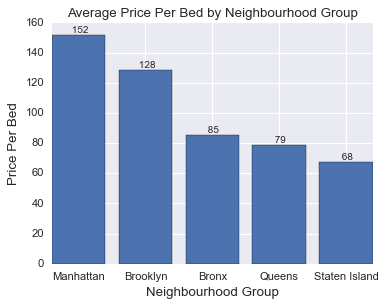

In [124]:
plt.figure(figsize=(5,4))
bars = plt.bar(price_per_bed.index, price_per_bed.values)
plt.ylabel('Price Per Bed')
plt.xlabel('Neighbourhood Group')
plt.title('Average Price Per Bed by Neighbourhood Group')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{bar.get_height(): ,.0f}', ha = 'center', va = 'bottom', fontsize = 9
            )
plt.tight_layout()
plt.show()

#### Bi Variable Analysis

In [90]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths', 'Price_Per_Bed'],
      dtype='object')

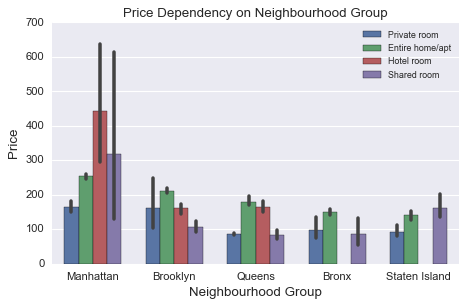

In [130]:
# Price Dependency on neighbourhood_group
plt.figure(figsize=(6,4))
price_order = df.groupby('neighbourhood_group')['price'].sum().sort_values(ascending = False)
sns.barplot(data = df,
            x = 'neighbourhood_group',
            y = 'price',
            order= price_order.index,width=0.7,
            hue= 'room_type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.title('Price Dependency on Neighbourhood Group')
#plt.margins(x =0.1)
plt.legend(loc = 'upper right', fontsize = 8)
plt.tight_layout()
plt.show()

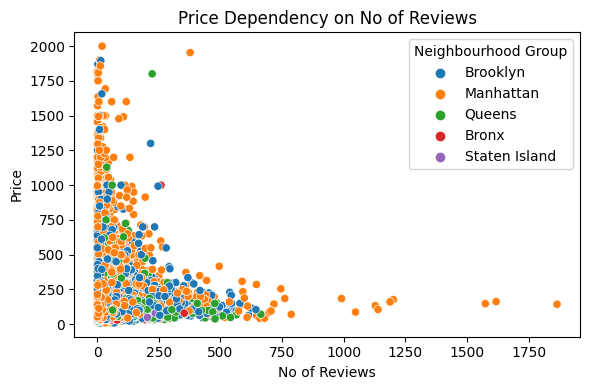

In [135]:
# relation of Number of reviews and Price
sns.reset_defaults()
plt.figure(figsize=(6,4))
sns.scatterplot(data = df_price_20000,
            x = 'number_of_reviews',
            y = 'price',
            hue= 'neighbourhood_group')
plt.xlabel('No of Reviews')
plt.ylabel('Price')
plt.title('Price Dependency on No of Reviews')
plt.legend(loc = 'upper right', title = 'Neighbourhood Group')
plt.tight_layout()
plt.show()


#### Correlation between all numerical columns

In [136]:
df_number = df.select_dtypes(include='number')

In [150]:
df_number

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds,Price_Per_Bed
0,40.683710,-73.964610,55.0,30.0,3.0,0.03,1.0,0.0,0.0,1,55.0
1,40.766610,-73.988100,144.0,30.0,9.0,0.24,139.0,364.0,2.0,1,144.0
2,40.750764,-73.994605,187.0,2.0,6.0,1.67,1.0,343.0,6.0,2,93.5
3,40.835600,-73.942500,120.0,30.0,156.0,1.38,2.0,363.0,12.0,1,120.0
4,40.751120,-73.978600,85.0,30.0,11.0,0.24,133.0,335.0,3.0,1,85.0
...,...,...,...,...,...,...,...,...,...,...,...
20765,40.711380,-73.991560,45.0,30.0,124.0,1.81,1.0,157.0,12.0,1,45.0
20766,40.730580,-74.000700,105.0,30.0,56.0,0.48,1.0,0.0,1.0,2,52.5
20767,40.757350,-73.993430,299.0,30.0,60.0,2.09,1.0,0.0,27.0,1,299.0
20768,40.713750,-73.991470,115.0,30.0,7.0,0.91,1.0,363.0,7.0,1,115.0


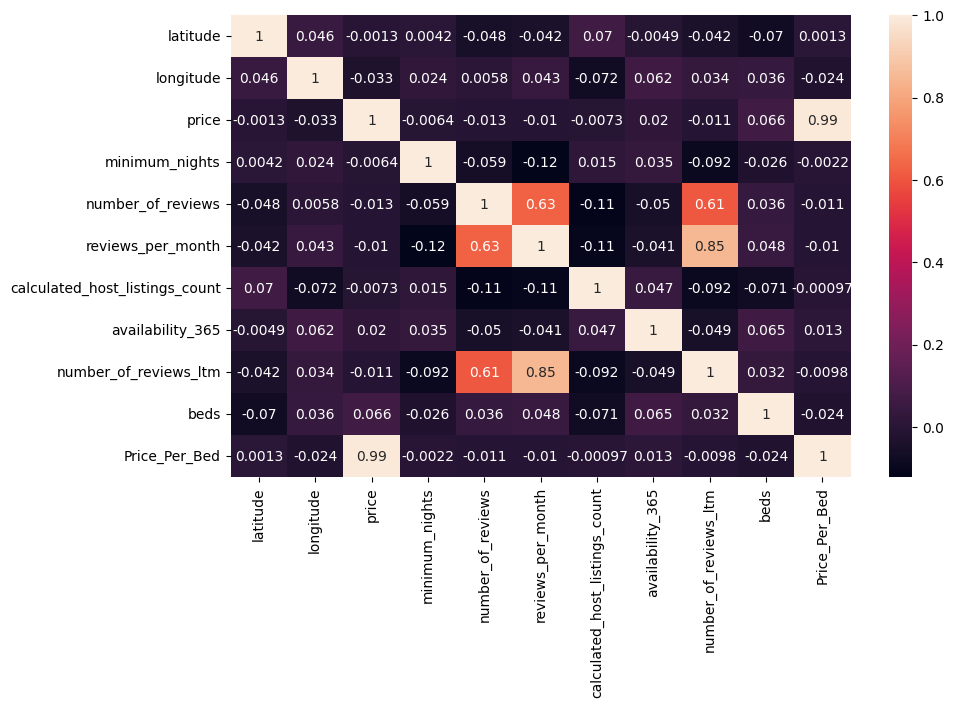

In [155]:
plt.figure(figsize=(10,6))
sns.heatmap(df_number.corr(), annot=True)
plt.show()

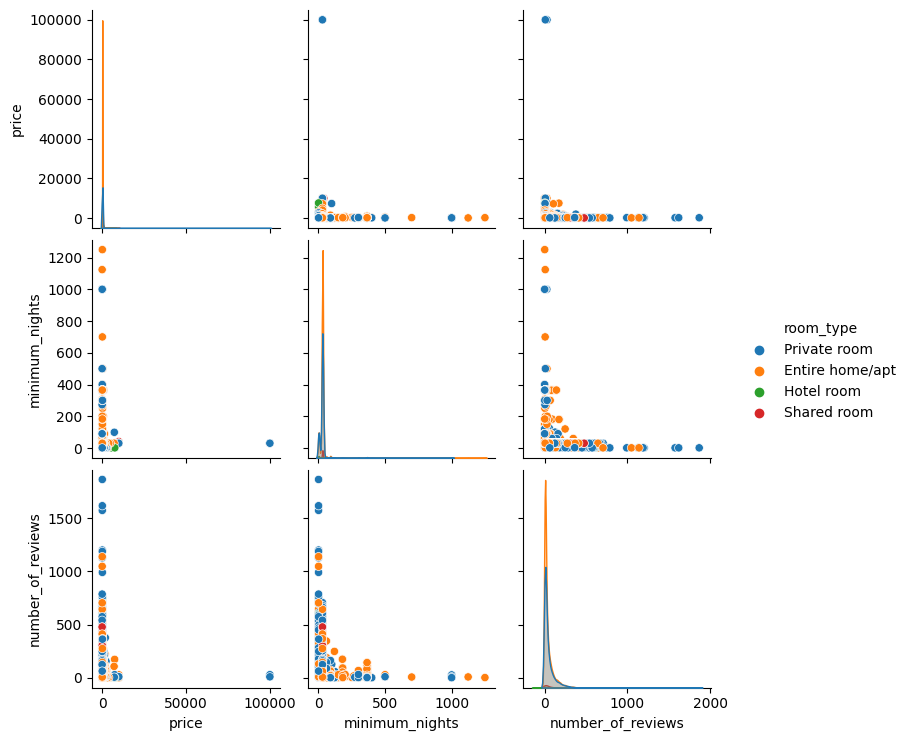

In [156]:
#plt.rcParams['figure.figsize']= [15, 10]
sns.pairplot(data = df, vars=['price', 'minimum_nights', 'number_of_reviews'], hue= 'room_type')
plt.show()